<a href="https://colab.research.google.com/github/Swap1984/swapnil/blob/main/SVM__RandomsearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for SVM with RandonmSearch CV

In [6]:
import pandas as pd
import numpy as np

#Getting the data into the data frame
data = pd.read_csv('/content/pima-indians-diabetes.csv', names=['preg', 'pass', 'press','skin', 'test', 'mass', 'pedi','age', 'class'])


The dataset is about monitoring diabetes in females ..

In [7]:
data.head()

,preg,pass,press,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   pass    768 non-null    int64  
 2   press   768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe()

,preg,pass,press,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.isnull().sum()

,0
preg,0
pass,0
press,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


In [11]:
#Seperating the input features and target variable
X= data.drop('class',axis=1)
y= data['class']

In [12]:
# Checking Class Distribution (Imbalanced Dataset)
print(data['class'].value_counts())

class
0    500
1    268
Name: count, dtype: int64


In [13]:
# Check class distribution (this gives in %)
data['class'].value_counts(normalize=True)

,proportion
class,
0,0.651042
1,0.348958


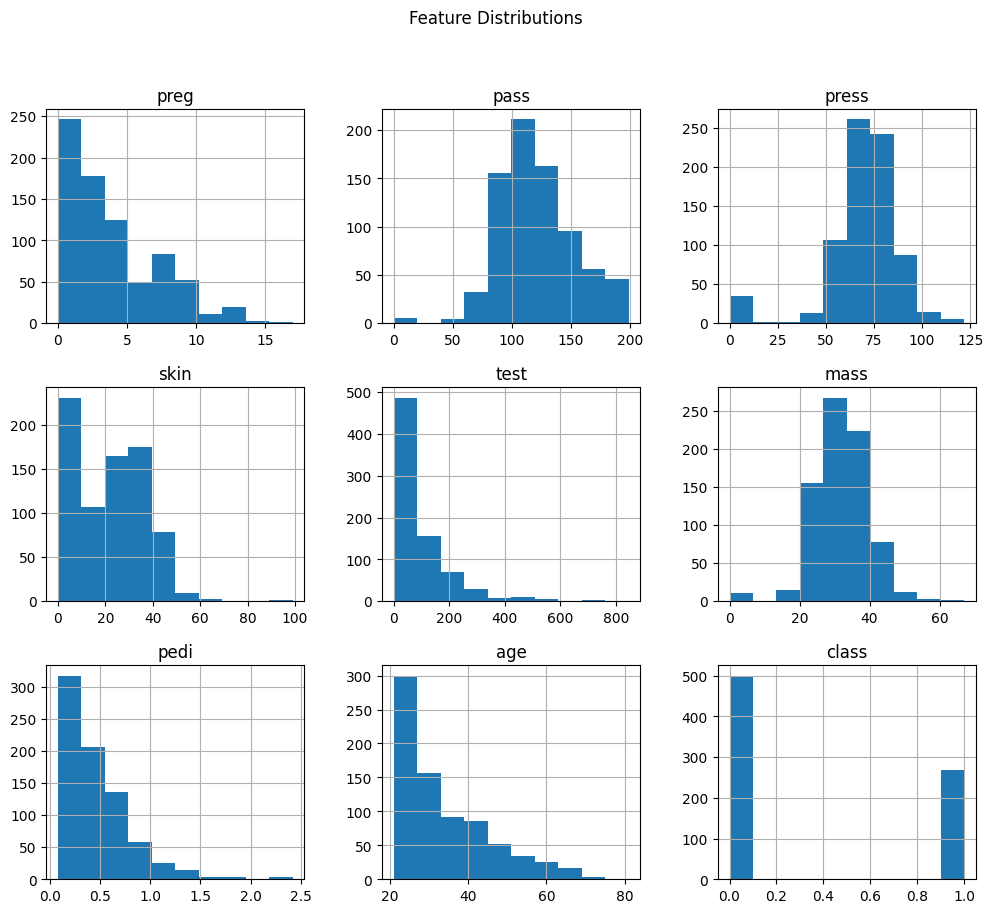

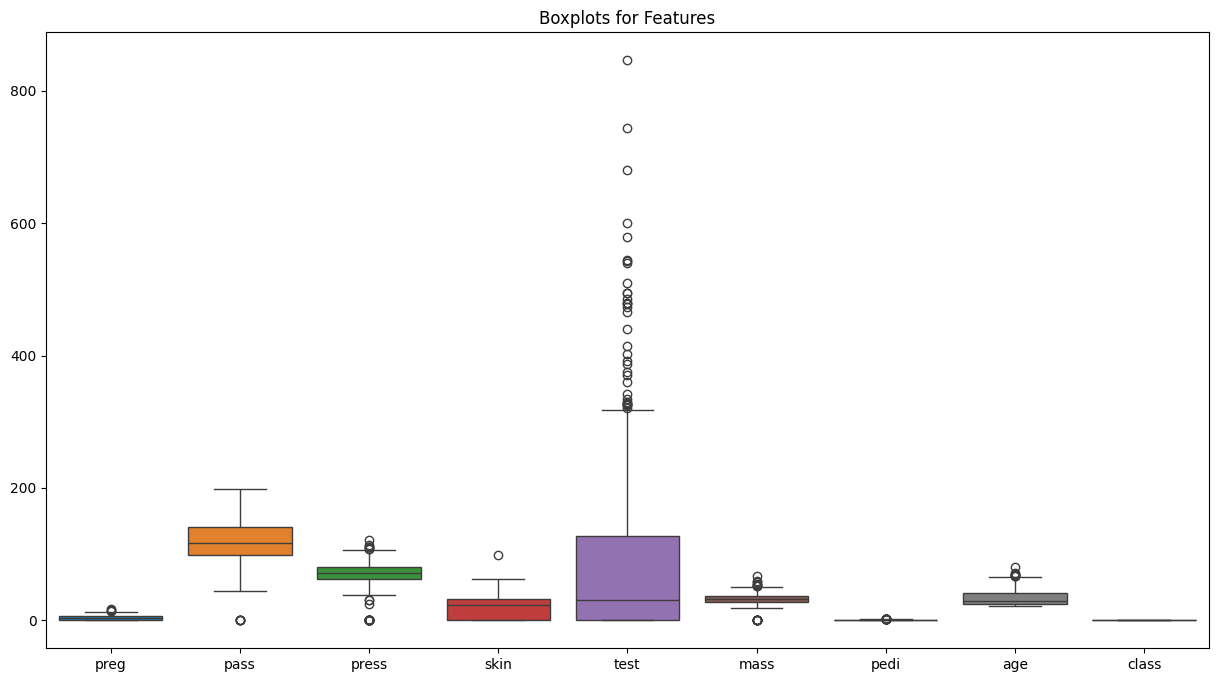

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
data.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()

# Plot boxplots for key features
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.title('Boxplots for Features')
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

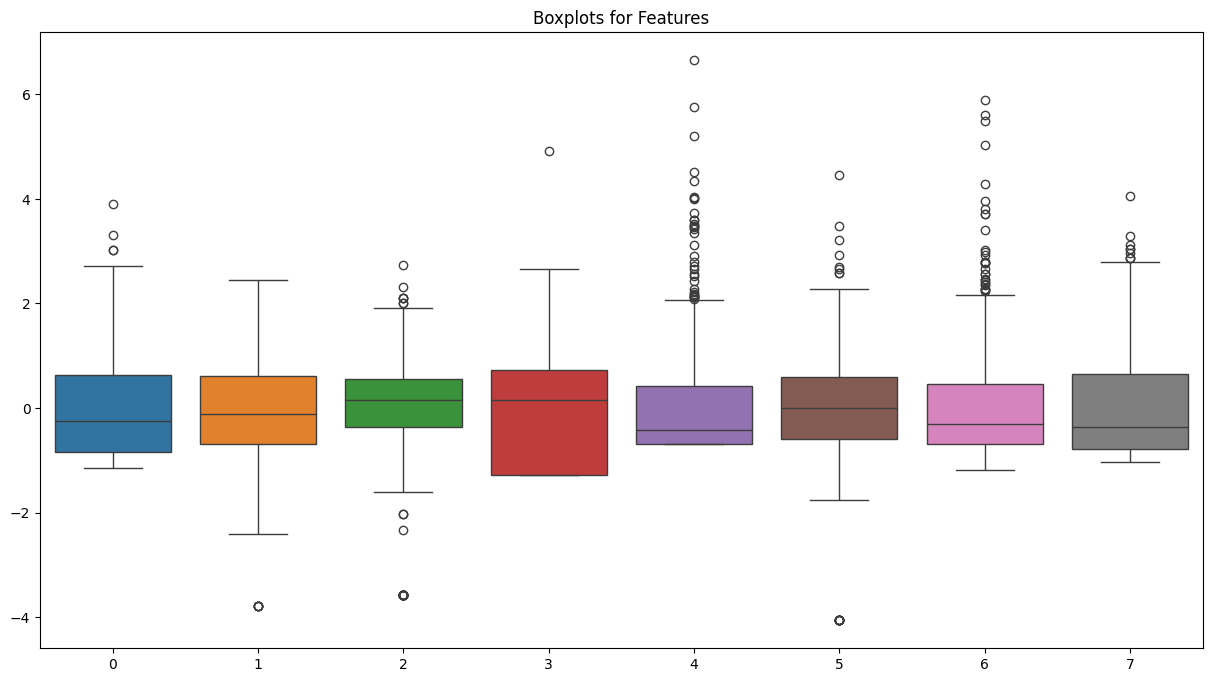

In [16]:
# Plot boxplots for key features
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_scaled)
plt.title('Boxplots for Features')
plt.show()

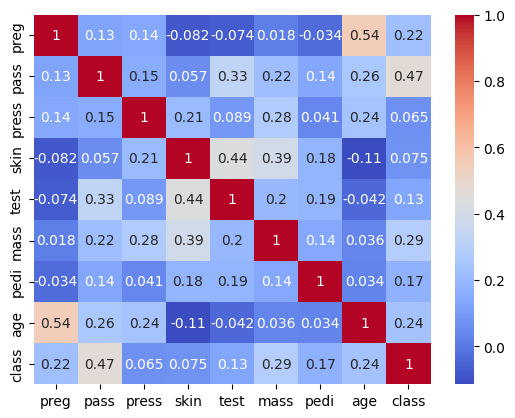

In [17]:
# Plot the correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


As seen that only glucose level and age are acually more correlated  to the target variablethus ignoring the outliers in other features we can move ahesd with sampling and model fitting.

In [18]:
# Split the data in train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Define SVC model
svc = SVC()

# Define the parameter grid for RBF kernel
param_grid = {
    'kernel': ['rbf', 'linear',],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [20]:
grid = RandomizedSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_iter=10)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'linear']},
                   scoring='accuracy')

In [21]:
# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


Best Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}
Best Cross-Validation Score: 0.7720111955217913


In [22]:
# Evaluate on the test set
y_pred = grid.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7727
Confusion Matrix:
[[82 17]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [23]:
# using ROC-AUC score for evaluation
from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

ROC-AUC Score: 0.7505050505050506


For ROC curve

In [24]:
# Create and train the SVC model
model = SVC(probability=True)  # Set probability=True to calculate ROC-AUC
model.fit(X_train, y_train)


SVC(probability=True)

In [26]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [27]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

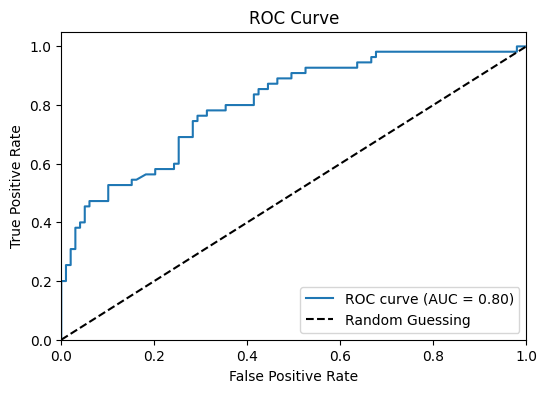

In [28]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Since we have the area under the curve is more than 90% above the random line we can consider that the model is functioning well.
